## 3. Overall alcohol consumption ranking

In this analysis, the goal is to identify which countries have the highest and lowest overall alcohol consumption.

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
datasetPath = '../../data/drinks.csv'
df = pd.read_csv(datasetPath)

In [9]:
def filter_greather_than_zero(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Filters the DataFrame, returning only the rows where the value in the specified column is greater than zero.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to evaluate.

    Returns:
        pd.DataFrame: A new DataFrame containing only the rows with positive values in the specified column.
    """
    return df.query(f'{column} > 0')

def get_ranking(df: pd.DataFrame, column: str, ascending: bool, head_amount: int) -> pd.DataFrame:
    """
    Returns a DataFrame with countries sorted based on a specific column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column used for sorting.
        ascending (bool): If True, sorts in ascending order; if False, in descending order.
        head_amount (int): Number of rows to return in the ranking.

    Returns:
        pd.DataFrame: A DataFrame containing the top-ranked countries based on the selected column.
    """
    return df.sort_values(by=column, ascending=ascending).head(head_amount)

def print_ranking(df: pd.DataFrame, column: str, ascending: bool, head_amount: int) -> None:
    """
    Displays the ranking of countries with the highest or lowest consumption based on the specified column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column used as the basis for ranking.
        ascending (bool): Whether to display in ascending (lowest consumption) or descending (highest consumption) order.
        head_amount (int): Number of countries to display in the ranking.

    Returns:
        None
    """
    display(df[['country', column]])

    print(f"\nTop {head_amount} countries with {'lowest' if ascending else 'highest'} consumption of {column}:")
    for i, row in enumerate(df.itertuples(index=False), start=1):
        print(f"{i}º {row.country} - {getattr(row, column)}")

def plot_ranking(df: pd.DataFrame, column: str, ascending: bool, head_amount: int) -> None:
    """
    Plots a bar chart showing the top countries with the highest or lowest consumption based on a specified column.

    Args:
        df (pd.DataFrame): The input DataFrame containing country data.
        column (str): The name of the column to use for the ranking (e.g., 'beer_servings').
        ascending (bool): If True, displays countries with the lowest consumption; if False, with the highest.
        head_amount (int): The number of countries to include in the chart.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.bar(df['country'], df[column])

    order = 'lowest' if ascending else 'highest'
    title_column = column.replace('_', ' ').title()
    plt.title(f'Top {head_amount} countries with {order} {title_column} consumption')

    plt.xlabel('Country')
    plt.ylabel(title_column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [10]:
total_litres_of_pure_alcohol_head_amount = 10
df_total_litres_of_pure_alcohol_grather_than_zero = filter_greather_than_zero(df, 'total_litres_of_pure_alcohol')

Countries with the lowest consumption.

,country,total_litres_of_pure_alcohol
38,Comoros,0.1
123,Niger,0.1
116,Myanmar,0.1
78,Indonesia,0.1
171,Timor-Leste,0.1
190,Yemen,0.1
149,Saudi Arabia,0.1
70,Guinea,0.2
119,Nepal,0.2
53,Egypt,0.2



Top 10 countries with lowest consumption of total_litres_of_pure_alcohol:
1º Comoros - 0.1
2º Niger - 0.1
3º Myanmar - 0.1
4º Indonesia - 0.1
5º Timor-Leste - 0.1
6º Yemen - 0.1
7º Saudi Arabia - 0.1
8º Guinea - 0.2
9º Nepal - 0.2
10º Egypt - 0.2


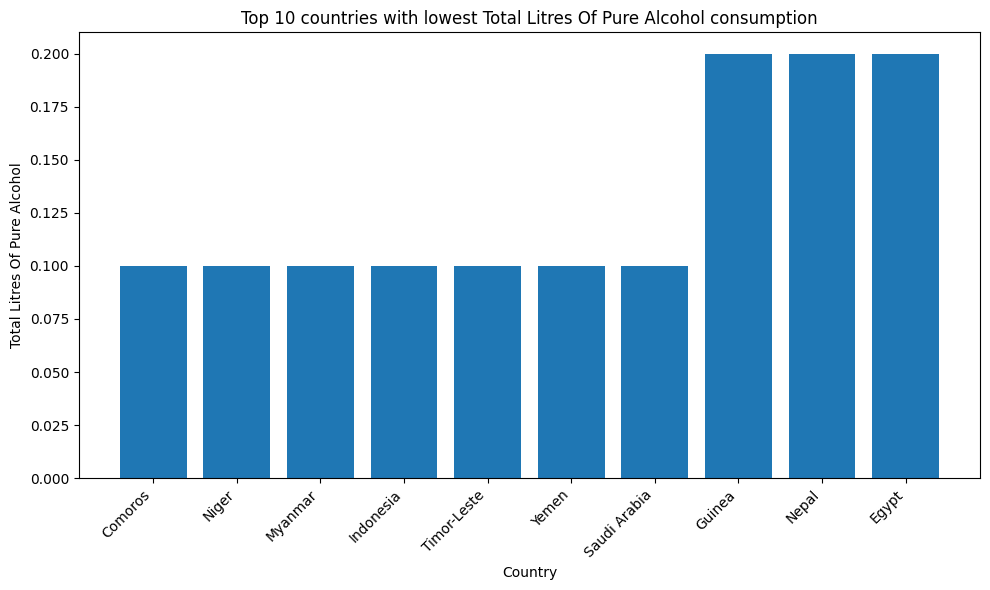

In [11]:
df_total_litres_of_pure_alcohol_asc = get_ranking(df_total_litres_of_pure_alcohol_grather_than_zero, 'total_litres_of_pure_alcohol', True, total_litres_of_pure_alcohol_head_amount)
print_ranking(df_total_litres_of_pure_alcohol_asc, 'total_litres_of_pure_alcohol', True, total_litres_of_pure_alcohol_head_amount)

plot_ranking(df_total_litres_of_pure_alcohol_asc, 'total_litres_of_pure_alcohol', True, total_litres_of_pure_alcohol_head_amount)

Countries with the highest consumption.

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
99,Luxembourg,11.4
81,Ireland,11.4
155,Slovakia,11.4



Top 10 countries with highest consumption of total_litres_of_pure_alcohol:
1º Belarus - 14.4
2º Lithuania - 12.9
3º Andorra - 12.4
4º Grenada - 11.9
5º Czech Republic - 11.8
6º France - 11.8
7º Russian Federation - 11.5
8º Luxembourg - 11.4
9º Ireland - 11.4
10º Slovakia - 11.4


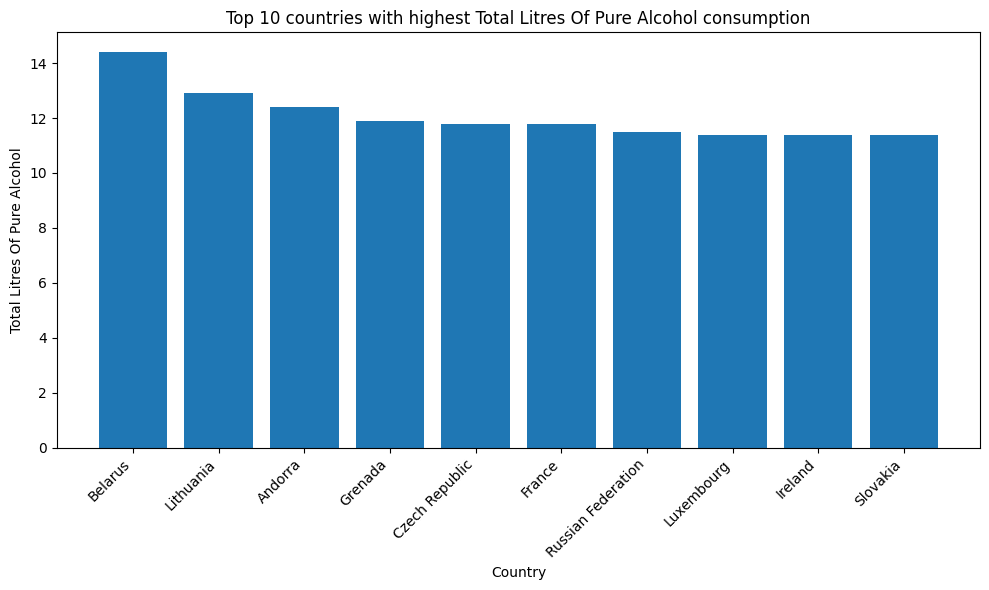

In [12]:
df_total_litres_of_pure_alcohol_desc = get_ranking(df_total_litres_of_pure_alcohol_grather_than_zero, 'total_litres_of_pure_alcohol', False, total_litres_of_pure_alcohol_head_amount)
print_ranking(df_total_litres_of_pure_alcohol_desc, 'total_litres_of_pure_alcohol', False, total_litres_of_pure_alcohol_head_amount)

plot_ranking(df_total_litres_of_pure_alcohol_desc, 'total_litres_of_pure_alcohol', False, total_litres_of_pure_alcohol_head_amount)